## Describe your cancer and your pathway:
- Using the CDC website, research the number of people who develop this cancer in the USA and other relevant information
    - Female breast cancer has the highest highest rate of new cancers at 119.2 out of 100,000 women. In 2020 in the united states according 
    to the CDC there was 239,612 new cases reported. Lung and bronchus cancer is second in the united states in 2020 having 97,019 new cases. 
    There is about 2.5X the amount of breast cancer patients comapred to lung cancer in women.

![graph](https://i.imgur.com/NQl8bkC.png)

- Describe how your pathway can impact cancer 
    - Wnt pathway has a crucial role in cancer becuase it facilitates cancer stem cell renewel, cell proliferation and differentiation (Zhang, 1). 
    The transcription factor β-catenin in normal cells will be regulated by being phosphorylated by GSK3β and CK1α. When phosphorylated it will be 
    targeted for degreadation by the proteasome via ubiquitin-mediated proteolysis; with β-catenin degraded gene transcription is halted (Zhang, 3). But, Wnt signlaing
    pathway orchestrates multiple cell signaling cascades, such as Notch, Sonic Hedgehog and PI3K/Akt pathway which have all been implicated in tumorigenesis.

In [2]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reads in df windows
paths = 'G:\\My Drive\\Spring 2024\\Cacner Genomics\\final_project\\data\\cbioportal\\brca_tcga_pub2015\\'
cna = pd.read_csv(paths+'data_cna.txt', sep='\t', index_col=0)
exp = pd.read_csv(paths+'data_mrna_seq_v2_rsem.txt', sep='\t')
met = pd.read_csv(paths+'data_methylation_hm450.txt', sep='\t')
mut = pd.read_csv(paths+'data_mutations.txt', sep='\t')
clin=pd.read_csv(paths+'data_clinical_patient.txt', sep='\t', skiprows=4, index_col=0)
rppa = pd.read_csv(paths+'data_clinical_sample.txt', sep='\t', skiprows=4, index_col=1)
clin.head(10)

,OTHER_PATIENT_ID,FORM_COMPLETION_DATE,PROSPECTIVE_COLLECTION,RETROSPECTIVE_COLLECTION,DAYS_TO_BIRTH,SEX,MENOPAUSE_STATUS,RACE,ETHNICITY,HISTORY_OTHER_MALIGNANCY,...,DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS,HISTOLOGICAL_DIAGNOSIS,ICD_10,ICD_O_3_HISTOLOGY,ICD_O_3_SITE,INFORMED_CONSENT_VERIFIED,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-LQ-A4E4,4F321D41-3255-46A4-AE0D-1CF39699E624,12/5/12,NO,YES,-26883,Female,Post (prior bilateral ovariectomy OR >12 mo si...,WHITE,NOT HISPANIC OR LATINO,No,...,0,Infiltrating Lobular Carcinoma,C50.9,8520/3,C50.9,YES,0:LIVING,27.89,1:Recurred/Progressed,22.37
TCGA-A2-A3KC,2D29A4AC-98E7-4663-9DD6-5681BC32AC2E,3/14/12,YES,NO,-20401,Female,Pre (<6 months since LMP AND no prior bilatera...,BLACK OR AFRICAN AMERICAN,NOT HISPANIC OR LATINO,No,...,0,Infiltrating Lobular Carcinoma,C50.9,8520/3,C50.9,YES,0:LIVING,36.2,0:DiseaseFree,36.2
TCGA-A2-A3KD,BB026999-0AAB-4232-96D7-2C93B6C9691D,4/2/12,YES,NO,-17372,Female,Pre (<6 months since LMP AND no prior bilatera...,WHITE,NOT HISPANIC OR LATINO,No,...,0,Mucinous Carcinoma,C50.9,8480/3,C50.9,YES,0:LIVING,39.62,0:DiseaseFree,39.62
TCGA-A7-A0D9,17baef7c-d97d-4b98-ab53-503ef856523d,10/4/10,YES,NO,-13836,Female,Pre (<6 months since LMP AND no prior bilatera...,WHITE,NOT HISPANIC OR LATINO,No,...,0,Infiltrating Ductal Carcinoma,C50.9,8500/3,C50.9,YES,0:LIVING,37.42,0:DiseaseFree,37.42
TCGA-A7-A0DA,3afa1e93-1df8-4e4c-aaa4-557463f4bb77,1/10/11,YES,NO,-22708,Female,Post (prior bilateral ovariectomy OR >12 mo si...,WHITE,NOT HISPANIC OR LATINO,No,...,0,Infiltrating Ductal Carcinoma,C50.9,8500/3,C50.9,YES,0:LIVING,35.64,0:DiseaseFree,35.64
TCGA-A7-A0CD,09765b0a-94f6-47d2-af56-93368084ac3a,10/5/10,YES,NO,-24242,Female,Indeterminate (neither Pre or Postmenopausal),WHITE,NOT HISPANIC OR LATINO,Yes,...,0,Infiltrating Ductal Carcinoma,C50.9,8500/3,C50.9,YES,0:LIVING,38.27,0:DiseaseFree,38.27
TCGA-D8-A13Z,5a17dcd9-5ced-4a69-8069-23c7fd0649d1,2/27/11,YES,NO,-18942,Female,Post (prior bilateral ovariectomy OR >12 mo si...,WHITE,NOT HISPANIC OR LATINO,No,...,0,Infiltrating Ductal Carcinoma,C50.9,8500/3,C50.9,YES,0:LIVING,20.86,0:DiseaseFree,20.86
TCGA-A7-A0CE,9d95a65b-e41d-4f93-92d4-99dce29ff40d,10/4/10,YES,NO,-20863,Female,Indeterminate (neither Pre or Postmenopausal),WHITE,NOT HISPANIC OR LATINO,No,...,0,Infiltrating Ductal Carcinoma,C50.9,8500/3,C50.9,YES,0:LIVING,35.28,0:DiseaseFree,35.28
TCGA-D8-A13Y,17f275c1-a0d4-487d-8f02-ea279584b4cd,2/23/11,YES,NO,-19028,Female,Post (prior bilateral ovariectomy OR >12 mo si...,WHITE,NOT HISPANIC OR LATINO,No,...,0,Infiltrating Ductal Carcinoma,C50.9,8500/3,C50.9,YES,0:LIVING,56.77,0:DiseaseFree,56.77


In [4]:
#reads in dfs mac
#paths= '/Users/maddie/Library/CloudStorage/GoogleDrive-medeirosmm@merrimack.edu/My Drive/Spring 2024/Cacner Genomics/final_project/data/cbioportal/brca_tcga_pub2015/'
#cna = pd.read_csv(paths+'data_cna.txt', sep='\t', index_col=0)
#exp = pd.read_csv(paths+'data_mrna_seq_v2_rsem.txt', sep='\t')
#met = pd.read_csv(paths+'data_methylation_hm450.txt', sep='\t')
#mut = pd.read_csv(paths+'data_mutations.txt', sep='\t')
#clin=pd.read_csv(paths+'data_clinical_patient.txt', sep='\t', skiprows=4, index_col=0)
#rppa = pd.read_csv(paths+'data_clinical_sample.txt', sep='\t', skiprows=4, index_col=1)

## Describe your cohort: 
- what are the observations how many?
    - copy number df: There are 818 observations, which are the  patients in the columns 
    - expression: here are 819 observations
    - methylation: there are 555 observations
    - mutations: there are 818 observations
    - clinical: there are 817 observations
- what variables are there for each observation, how many?
    - copy number: there are 22247 features and they are the genes in the rows
    - expression: there are 20440 features and they are the genes in the rows
    - methylation: there are 16120 features and they are in the rows 
    - mutations: there are 79 features
    - clinical: there are 43 features

In [5]:
#Rows, Columns
print(cna.shape)
print(exp.shape)
print(met.shape)
print(mut.shape)
print(clin.shape)

(22247, 817)
(20440, 819)
(16120, 555)
(69968, 79)
(817, 43)


## Analyze the mutations of genes in your pathway: 
First, use the source to make a list of the genes in the pathway. You don't need intimate knowledge of the pathway to start with, just the genes in it.

List of Genes:
1. FZD 
3. DvL, 
4. AXIN, 
5. APC, 
6. GSK-3β, 
7. WNT 
8. β-catenin
9. TCF/LEF

Make a figure (such as from cBioPortal) summarizing the mutations.

How many patients have each gene mutated with either copy number alterations or point mutations?

- FZD: 32
- DvL: 9
- AXin: 14
- APC: 21
- GSK-3β: 2
- WNT: 43
- β-catenin: 4
- TCF: 61

For the top 3 most mutated genes: 

how often is each gene mutated 

- APC: 21
- TCF20: 13
- TCF4: 13

are the mutations activating or inactivating? 

- APC: Inactivating
- TCF20: Inactivating
- TCF4: Inactivating

- When analyzing if these genes are activating or inactivating there are a few things that were taken into consideration. First, none of the mutations present in our top 3 have mutations occuring in any known hotspot. Additonally, the mutations in each gene where scattered throughout the sequence. Taking this into account and applying the 20/20 rule this points to that these genes are most likely inactivating. Looking further into the copy number alteration data we see that a majority of alterations are deletions. Thus these mutations point to these mutations being inactivating based on this evidence.

Is the mutation pattern consistent with oncogene or tumor suppressor activity in cancer?

- APC: Tumor Supressor
- TCF20: Tumor Suppressor
- TCF4: Tumor Suppressor

- Since these genes have a pattern consisting of inactivating mutations these genes are most likely to be tumor suppressor genes based on the patterns of mutations within this cohort. 

Which of your top 3 mutations is associated with increased or decreased survival outcome? 

- All of the genes shows an increase in survival outcome but APC shows the highest survival outcome compared to TCF20 and TCF4.

How often is the pathway mutated overall in this cancer (how many patients have one or more genes mutated)?

- In this cohort 45 patients had at least one mutation in genes involved in the wnt signaling pathway.

In [6]:
#patterns
#raw string helps us find specific values in gene name column
tcf_patt=r"^TCF"
dvl_patt=r"^DVL"
axin_patt=r"^AXIN"

In [7]:
#gets genes of interest
fzd= mut[mut['Hugo_Symbol'].str.contains('FZD')]
dvl=mut[mut['Hugo_Symbol'].str.contains(dvl_patt)] 
axin=mut[mut['Hugo_Symbol'].str.contains(axin_patt)] 
apc= mut[mut['Hugo_Symbol']=='APC']
gsk3b= mut[mut['Hugo_Symbol'].str.contains('GSK3B')]
wnt =mut[mut['Hugo_Symbol'].str.contains('WNT')]
bcat=mut[mut['Hugo_Symbol'].str.contains('CTNNB1')]
tcf=mut[mut['Hugo_Symbol'].str.contains(tcf_patt)]
lef=mut[mut['Hugo_Symbol'].str.contains('LEF1')]
#concats them all together
wnt_mut= pd.concat([fzd,dvl,axin,apc,gsk3b,wnt,bcat,tcf,lef], axis=0)
wnt_mut

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,DOMAINS,MOTIF_SCORE_CHANGE,PolyPhen,ENSP,Amino_acids,CCDS,EA_MAF,Allele,cDNA_position,PUBMED
2902,FZD1,8321,genome.wustl.edu;unc.edu,GRCh37,7,90895264,90895264,+,missense_variant,Missense_Mutation,...,"Transmembrane_helices:Tmhmm,Pfam_domain:PF0153...",NaN,probably_damaging(0.976),ENSP00000287934,F/I,CCDS5620.1,NaN,A,1482/4341,NaN
10264,FZD4,8322,genome.wustl.edu;unc.edu,GRCh37,11,86663462,86663462,+,synonymous_variant,Silent,...,"Pfam_domain:PF01392,PROSITE_profiles:PS50038,S...",NaN,NaN,ENSP00000434034,I,CCDS8279.1,NaN,A,642/7383,NaN
11006,FZD6,8323,genome.wustl.edu,GRCh37,8,104340619,104340619,+,missense_variant,Missense_Mutation,...,Pfam_domain:PF01534,NaN,probably_damaging(1),ENSP00000351605,F/V,CCDS6298.1,NaN,G,1833/3788,NaN
11136,FZD2,2535,genome.wustl.edu;unc.edu,GRCh37,17,42636265,42636265,+,synonymous_variant,Silent,...,"Pfam_domain:PF01534,PROSITE_profiles:PS50261",NaN,NaN,ENSP00000323901,F,CCDS11484.1,NaN,T,1341/1983,NaN
11412,FZD9,8326,genome.wustl.edu,GRCh37,7,72849171,72849171,+,synonymous_variant,Silent,...,"Transmembrane_helices:Tmhmm,Pfam_domain:PF0153...",NaN,NaN,ENSP00000345785,S,CCDS5548.1,NaN,A,1063/2342,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67779,TCF20,6942,genome.wustl.edu;unc.edu,GRCh37,22,42609210,42609210,+,missense_variant,Missense_Mutation,...,NaN,NaN,possibly_damaging(0.555),ENSP00000352463,S/F,CCDS14033.1,NaN,A,2239/7410,NaN
67871,TCF12,6938,genome.wustl.edu,GRCh37,15,57458613,57458613,+,missense_variant,Missense_Mutation,...,PROSITE_profiles:PS50324,NaN,benign(0.003),ENSP00000388940,E/D,CCDS10160.1,NaN,T,635/4786,NaN
69590,TCF7L1,83439,genome.wustl.edu;unc.edu,GRCh37,2,85529633,85529633,+,missense_variant,Missense_Mutation,...,"Low_complexity_(Seg):Seg,Pfam_domain:PF08347,P...",NaN,possibly_damaging(0.87),ENSP00000282111,H/Q,CCDS1971.1,NaN,A,827/2968,NaN
69871,TCF20,6942,genome.wustl.edu;unc.edu,GRCh37,22,42609249,42609249,+,missense_variant,Missense_Mutation,...,NaN,NaN,benign(0),ENSP00000352463,A/G,CCDS14033.1,NaN,C,2200/7410,NaN


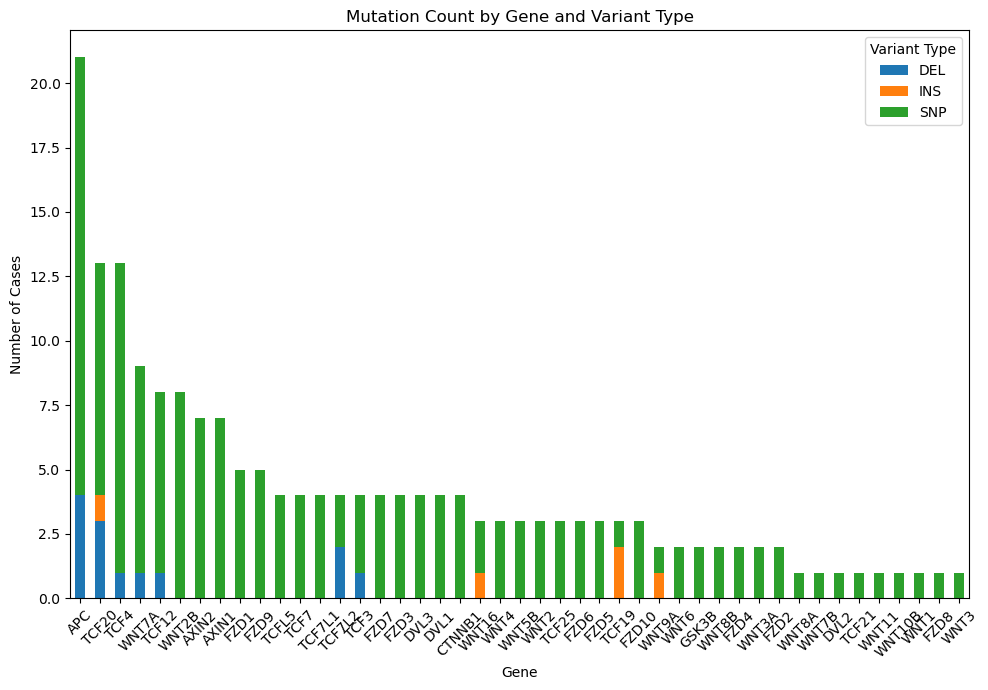

In [8]:
#Make a figure (such as from cBioPortal) summarizing the mutations.


#count occurrences of each variant type per gene
mutation_counts = wnt_mut.groupby(['Hugo_Symbol', 'Variant_Type']).size().unstack(fill_value=0)

#calculate the total mutations per gene and makes a new column
mutation_counts['Total'] = mutation_counts.sum(axis=1)

#sort based on the Total column in descending order
mutation_counts_sorted = mutation_counts.sort_values(by='Total', ascending=False)

#drop the total column as it's no longer needed for the plot
mutation_counts = mutation_counts_sorted.drop(columns=['Total'])

#plotting the data
mutation_counts.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Mutation Count by Gene and Variant Type')
plt.xlabel('Gene')
plt.ylabel('Number of Cases')
plt.legend(title='Variant Type')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()


In [9]:
#gets total amounts of mutations present in each gene
mutation_counts_sorted['Total']


Hugo_Symbol
APC       21
TCF20     13
TCF4      13
WNT7A      9
TCF12      8
WNT2B      8
AXIN2      7
AXIN1      7
FZD1       5
FZD9       5
TCFL5      4
TCF7       4
TCF7L1     4
TCF7L2     4
TCF3       4
FZD7       4
FZD3       4
DVL3       4
DVL1       4
CTNNB1     4
WNT16      3
WNT4       3
WNT5B      3
WNT2       3
TCF25      3
FZD6       3
FZD5       3
TCF19      3
FZD10      3
WNT9A      2
WNT6       2
GSK3B      2
WNT8B      2
FZD4       2
WNT3A      2
FZD2       2
WNT8A      1
WNT7B      1
DVL2       1
TCF21      1
WNT11      1
WNT10B     1
WNT1       1
FZD8       1
WNT3       1
Name: Total, dtype: int64

In [10]:
#How many patients have each gene mutated with either copy number alterations or point mutations?

#Counts how many patients have a mutation in specific gene more generalized so groups together 
fzd_counts=mutation_counts_sorted[mutation_counts_sorted.index.str.contains('FZD')].sum()

dvl_counts=mutation_counts_sorted[mutation_counts_sorted.index.str.contains('DVL')].sum()

axin_counts=mutation_counts_sorted[mutation_counts_sorted.index.str.contains('AXIN')].sum()

gsk_counts=mutation_counts_sorted[mutation_counts_sorted.index.str.contains('GSK3B')].sum()

wnt_counts=mutation_counts_sorted[mutation_counts_sorted.index.str.contains('WNT')].sum()

ctnnb1_counts=mutation_counts_sorted[mutation_counts_sorted.index.str.contains('CTNNB1')].sum()

tcf_counts=mutation_counts_sorted[mutation_counts_sorted.index.str.contains('TCF')].sum()



In [11]:
#adds survival status column to top 3 genes

#Gets rows containing specific gene
tcf20=wnt_mut[wnt_mut['Hugo_Symbol']=='TCF20']
tcf4=wnt_mut[wnt_mut['Hugo_Symbol']=='TCF4']
apc1=wnt_mut[wnt_mut['Hugo_Symbol']=='APC']

#Concats together
top3=pd.concat([tcf20,tcf4,apc1])

#removes -01 at the end of bar codes so we can merge on ids
top3['Tumor_Sample_Barcode'] = top3['Tumor_Sample_Barcode'].str.replace(r'-01$', '', regex=True) 

#Gets tumorsample ids and puts it in a list
ids=top3['Tumor_Sample_Barcode'].to_list()

#gets only ids that are in our data frame
surv= clin[clin.index.isin(ids)]

#sets index to bar code
top3=top3.set_index('Tumor_Sample_Barcode')

#grabs just survival status
status= surv['OS_STATUS']

#joins by tumor id
top3= top3.join(surv['OS_STATUS'],how='left')

top3

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,MOTIF_SCORE_CHANGE,PolyPhen,ENSP,Amino_acids,CCDS,EA_MAF,Allele,cDNA_position,PUBMED,OS_STATUS
Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,
TCGA-A2-A3XT,TCF20,6942,genome.wustl.edu;unc.edu,GRCh37,22,42607383,42607383,+,missense_variant,Missense_Mutation,...,NaN,possibly_damaging(0.541),ENSP00000352463,S/C,CCDS14033.1,NaN,C,4066/7410,NaN,0:LIVING
TCGA-A7-A3IZ,APC,324,genome.wustl.edu,GRCh37,5,112155003,112155006,+,frameshift_variant,Frame_Shift_Del,...,NaN,NaN,ENSP00000413133,NaN,CCDS4107.1,NaN,-,1654-1657/11025,NaN,0:LIVING
TCGA-A8-A07R,TCF4,6925,genome.wustl.edu,GRCh37,18,52921803,52921803,+,synonymous_variant,Silent,...,NaN,NaN,ENSP00000381382,S,CCDS58631.1,NaN,G,1638/2478,NaN,0:LIVING
TCGA-A8-A084,TCF20,6942,genome.wustl.edu;unc.edu,GRCh37,22,42607000,42607000,+,missense_variant,Missense_Mutation,...,NaN,possibly_damaging(0.453),ENSP00000352463,R/C,CCDS14033.1,NaN,A,4449/7410,NaN,0:LIVING
TCGA-A8-A08T,TCF20,6942,genome.wustl.edu;unc.edu,GRCh37,22,42609296,42609298,+,inframe_deletion,In_Frame_Del,...,NaN,NaN,ENSP00000352463,N/-,CCDS14033.1,NaN,-,2151-2153/7410,NaN,1:DECEASED
TCGA-A8-A0A7,TCF4,6925,genome.wustl.edu,GRCh37,18,52896160,52896160,+,synonymous_variant,Silent,...,NaN,NaN,ENSP00000381382,L,CCDS58631.1,NaN,A,2160/2478,NaN,0:LIVING
TCGA-AC-A23H,APC,324,genome.wustl.edu;unc.edu,GRCh37,5,112176467,112176467,+,missense_variant,Missense_Mutation,...,NaN,possibly_damaging(0.861),ENSP00000413133,E/Q,CCDS4107.1,NaN,C,5556/11025,NaN,1:DECEASED
TCGA-AC-A23H,APC,324,genome.wustl.edu;unc.edu,GRCh37,5,112179740,112179740,+,missense_variant,Missense_Mutation,...,NaN,probably_damaging(1),ENSP00000413133,D/H,CCDS4107.1,NaN,C,8829/11025,NaN,1:DECEASED
TCGA-AN-A0AK,TCF20,6942,genome.wustl.edu,GRCh37,22,42610948,42610948,+,frameshift_variant,Frame_Shift_Del,...,NaN,NaN,ENSP00000352463,NaN,CCDS14033.1,0.000116,-,501/7410,NaN,0:LIVING


In [12]:
#are the mutations activating or inactivating?

#selects columns we want
we_want = ['Hugo_Symbol', 'Variant_Classification', 'CDS_position', 'Hotspot']
sub_top3 = top3.loc[:, we_want]
#no hotspots 
sub_top3


,Hugo_Symbol,Variant_Classification,CDS_position,Hotspot
Tumor_Sample_Barcode,,,,
TCGA-A2-A3XT,TCF20,Missense_Mutation,3929/5883,0
TCGA-A7-A3IZ,APC,Frame_Shift_Del,1274-1277/8532,0
TCGA-A8-A07R,TCF4,Silent,1581/2322,0
TCGA-A8-A084,TCF20,Missense_Mutation,4312/5883,0
TCGA-A8-A08T,TCF20,In_Frame_Del,2014-2016/5883,0
TCGA-A8-A0A7,TCF4,Silent,2103/2322,0
TCGA-AC-A23H,APC,Missense_Mutation,5176/8532,0
TCGA-AC-A23H,APC,Missense_Mutation,8449/8532,0
TCGA-AN-A0AK,TCF20,Frame_Shift_Del,364/5883,0


In [13]:

#list of genes
g = ['APC', 'TCF4', 'TCF20']

#gets rows 
cna_top3_m = cna.index.isin(g)

#index
cna_top3 = cna[cna_top3_m]

#drop entrez column
cna_top3 = cna_top3.drop(columns=['Entrez_Gene_Id'])

cna_top3


,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,TCGA-A1-A0SE-01,TCGA-A1-A0SF-01,TCGA-A1-A0SH-01,TCGA-A1-A0SI-01,TCGA-A1-A0SJ-01,TCGA-A1-A0SK-01,TCGA-A1-A0SM-01,TCGA-A1-A0SN-01,...,TCGA-LL-A5YM-01,TCGA-LL-A5YN-01,TCGA-LL-A5YO-01,TCGA-LL-A5YP-01,TCGA-LQ-A4E4-01,TCGA-MS-A51U-01,TCGA-OL-A66H-01,TCGA-OL-A66I-01,TCGA-OL-A66J-01,TCGA-OL-A66K-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
APC,0,0,0,0,0,0,1,-1,0,1,...,-1,-1,0,-1,0,1,0,-1,-1,0
TCF4,0,-1,0,0,0,-1,0,1,0,0,...,-1,0,-1,-2,-1,0,0,1,0,0
TCF20,0,-1,0,0,0,0,-1,-1,0,-1,...,1,-1,-1,0,-1,0,0,-1,0,-1


C:\Users\OWNER\AppData\Local\Temp\ipykernel_59456\2848437250.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cnv_counts_sorted.index, rotation=90)


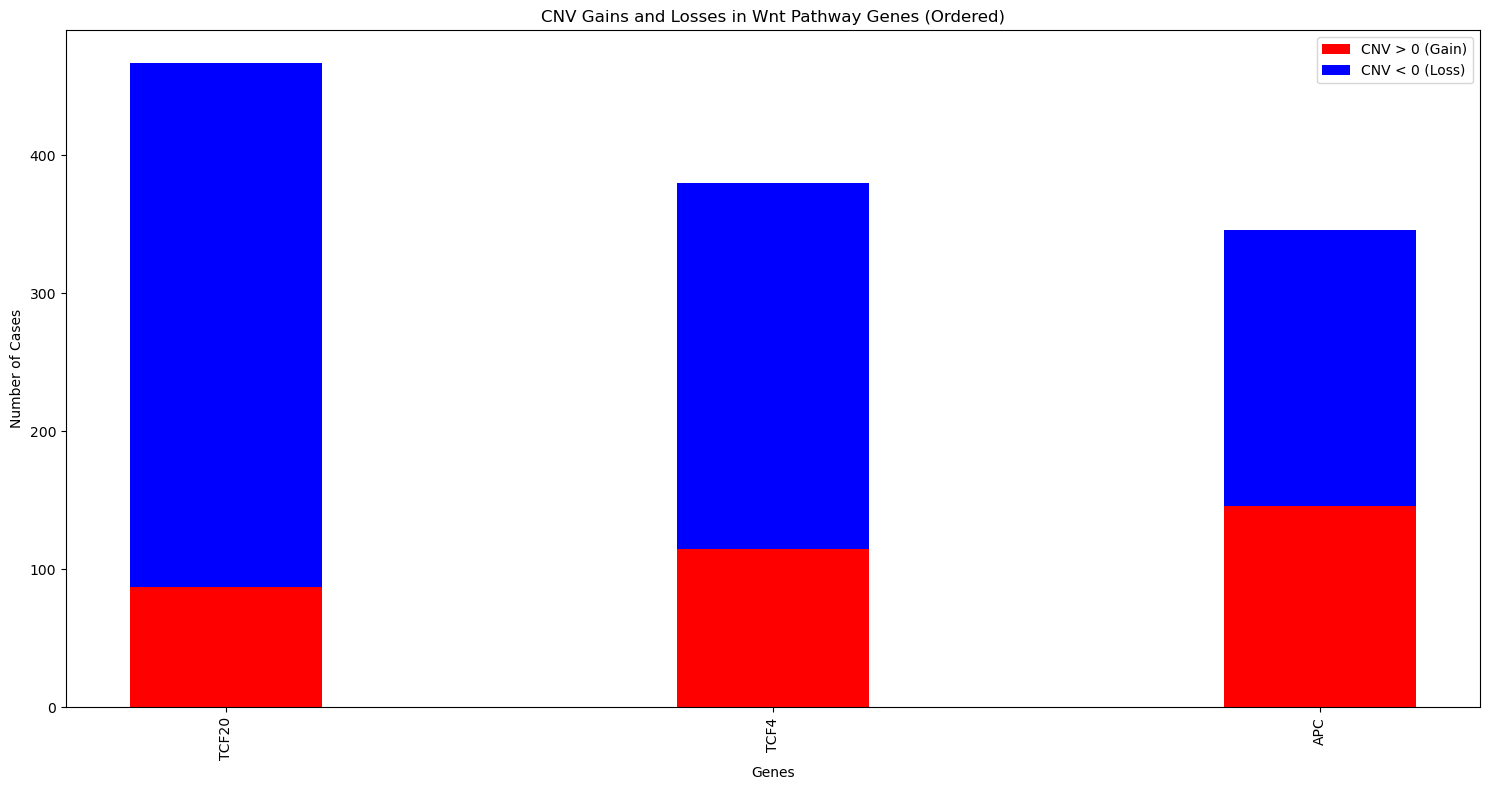

In [14]:
#are the mutations activating or inactivating? / oncogene or tsg



#calculate gains and losses
gains = (cna_top3 > 0).sum(axis=1)
losses = (cna_top3 < 0).sum(axis=1)

#combine 
cnv_counts = pd.DataFrame({'Gain': gains, 'Loss': losses})

#sort genes by total number of alterations
cnv_counts['Total'] = cnv_counts['Gain'] + cnv_counts['Loss']
cnv_counts_sorted = cnv_counts.sort_values('Total', ascending=False).drop('Total', axis=1)

#bar plot
fig, ax = plt.subplots(figsize=(15, 8))  # You may need to adjust the figure size
bar_width = 0.35  # Set the width of the bars

#plot for each gene
ax.bar(cnv_counts_sorted.index, cnv_counts_sorted['Gain'], width=bar_width, label='CNV > 0 (Gain)', color='red')
ax.bar(cnv_counts_sorted.index, cnv_counts_sorted['Loss'], width=bar_width, bottom=cnv_counts_sorted['Gain'], label='CNV < 0 (Loss)', color='blue')

#add labels and title
ax.set_ylabel('Number of Cases')
ax.set_title('CNV Gains and Losses in Wnt Pathway Genes (Ordered)')
ax.set_xticklabels(cnv_counts_sorted.index, rotation=90)
ax.set_xlabel('Genes')
ax.legend()

#display
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

In [15]:
cnv_counts

,Gain,Loss,Total
Hugo_Symbol,,,
APC,146,200,346
TCF4,115,265,380
TCF20,87,380,467


In [16]:
#Which of your top 3 mutations is associated with increased or decreased survival outcome? 

#Groups by gene name and alive status
grouped_data = top3.groupby(['Hugo_Symbol', 'OS_STATUS']).size().reset_index(name='Count')
grouped_data


,Hugo_Symbol,OS_STATUS,Count
0,APC,0:LIVING,16
1,APC,1:DECEASED,5
2,TCF20,0:LIVING,12
3,TCF20,1:DECEASED,1
4,TCF4,0:LIVING,11
5,TCF4,1:DECEASED,2


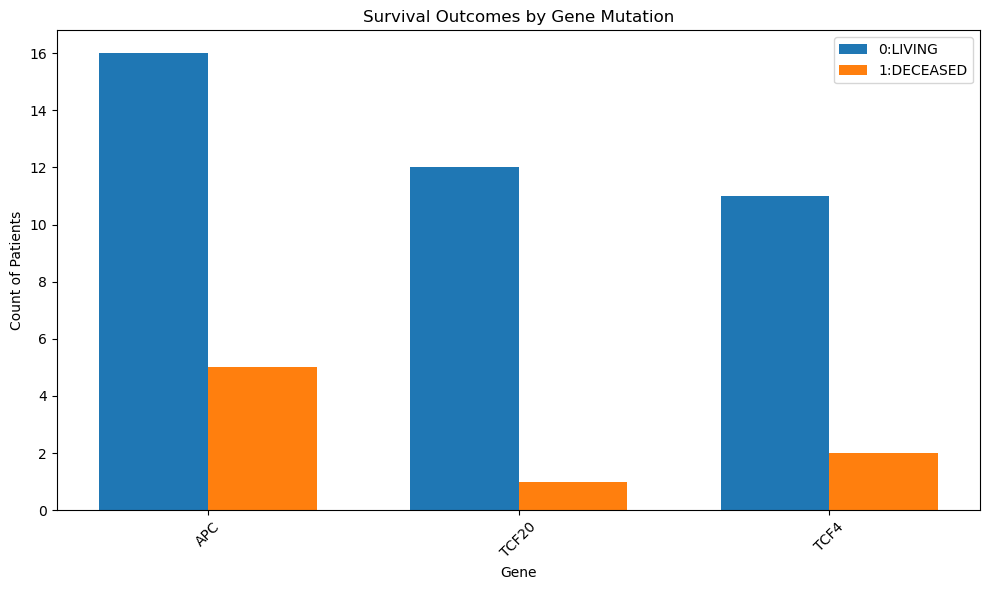

In [17]:
#Which of your top 3 mutations is associated with increased or decreased survival outcome? 

#pivot the data to get statuses as columns
pivot_data = grouped_data.pivot(index='Hugo_Symbol', columns='OS_STATUS', values='Count').fillna(0)

#setting up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

#define the number of groups and bar width
n_groups = pivot_data.shape[0]
index = np.arange(n_groups)
bar_width = 0.35

#plotting each survival status
for i, surv_status in enumerate(pivot_data.columns):
    ax.bar(index + i * bar_width, pivot_data[surv_status], bar_width, label=surv_status)

#adding labels, title, custom x-axis ticks, legend
ax.set_xlabel('Gene')
ax.set_ylabel('Count of Patients')
ax.set_title('Survival Outcomes by Gene Mutation')
ax.set_xticks(index + bar_width / 2 * (pivot_data.columns.size - 1))
ax.set_xticklabels(pivot_data.index)
ax.legend()
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [18]:
#sets index to gene name
wnt_mut1 = wnt_mut.set_index('Hugo_Symbol')
wnt_mut1

,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,Variant_Type,...,DOMAINS,MOTIF_SCORE_CHANGE,PolyPhen,ENSP,Amino_acids,CCDS,EA_MAF,Allele,cDNA_position,PUBMED
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
FZD1,8321,genome.wustl.edu;unc.edu,GRCh37,7,90895264,90895264,+,missense_variant,Missense_Mutation,SNP,...,"Transmembrane_helices:Tmhmm,Pfam_domain:PF0153...",NaN,probably_damaging(0.976),ENSP00000287934,F/I,CCDS5620.1,NaN,A,1482/4341,NaN
FZD4,8322,genome.wustl.edu;unc.edu,GRCh37,11,86663462,86663462,+,synonymous_variant,Silent,SNP,...,"Pfam_domain:PF01392,PROSITE_profiles:PS50038,S...",NaN,NaN,ENSP00000434034,I,CCDS8279.1,NaN,A,642/7383,NaN
FZD6,8323,genome.wustl.edu,GRCh37,8,104340619,104340619,+,missense_variant,Missense_Mutation,SNP,...,Pfam_domain:PF01534,NaN,probably_damaging(1),ENSP00000351605,F/V,CCDS6298.1,NaN,G,1833/3788,NaN
FZD2,2535,genome.wustl.edu;unc.edu,GRCh37,17,42636265,42636265,+,synonymous_variant,Silent,SNP,...,"Pfam_domain:PF01534,PROSITE_profiles:PS50261",NaN,NaN,ENSP00000323901,F,CCDS11484.1,NaN,T,1341/1983,NaN
FZD9,8326,genome.wustl.edu,GRCh37,7,72849171,72849171,+,synonymous_variant,Silent,SNP,...,"Transmembrane_helices:Tmhmm,Pfam_domain:PF0153...",NaN,NaN,ENSP00000345785,S,CCDS5548.1,NaN,A,1063/2342,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCF20,6942,genome.wustl.edu;unc.edu,GRCh37,22,42609210,42609210,+,missense_variant,Missense_Mutation,SNP,...,NaN,NaN,possibly_damaging(0.555),ENSP00000352463,S/F,CCDS14033.1,NaN,A,2239/7410,NaN
TCF12,6938,genome.wustl.edu,GRCh37,15,57458613,57458613,+,missense_variant,Missense_Mutation,SNP,...,PROSITE_profiles:PS50324,NaN,benign(0.003),ENSP00000388940,E/D,CCDS10160.1,NaN,T,635/4786,NaN
TCF7L1,83439,genome.wustl.edu;unc.edu,GRCh37,2,85529633,85529633,+,missense_variant,Missense_Mutation,SNP,...,"Low_complexity_(Seg):Seg,Pfam_domain:PF08347,P...",NaN,possibly_damaging(0.87),ENSP00000282111,H/Q,CCDS1971.1,NaN,A,827/2968,NaN


In [19]:
#How often is the pathway mutated overall in this cancer (how many patients have one or more genes mutated)?

#counts how many times
mutation_counts = wnt_mut1.index.value_counts()

#determine how many patients have one or more mutations
patients_with_mutations = mutation_counts[mutation_counts >= 1].count()

print(f"Number of patients with one or more mutations in the Wnt pathway: {patients_with_mutations}")

Number of patients with one or more mutations in the Wnt pathway: 45


## Gene expression analysis. 
- Pick a gene (possibly the same gene) for each of the gene expression analyses below. For each of the two types of (epi)genomic changes listed below, make a figure to visualize the association of the (epi)genomic alteration and gene expression. Then, interpret your figure: this includes stating how the (epi)genomic alteration effects this gene and what we can conclude about which subjects have oncogenic changes to this gene.
    - Association of expression and methylation at the locus.
        - From the scatter plot we see no clear linear relationship between methylation and expression. The correlation coefficient of -0.277 indicates a weak inverse relationship between gene expression and methylation levels. This suggests that generally, higher methylation levels might be associated with lower expression. The negative correlation seen here may imply that subjects with higher methylation levels of APC might be more likely to exhibit downregulation of APC expression, which could contribute to oncogenesis. However, the relatively weak correlation also indicates that there are likely other factors influencing APC expression and that methylation is not the sole regulator.

    - Association of expression and copy number at the locus.
        - A pearson r of 0.447 indicates a moderate positive correlation. We can also see this visually becuase as the copy number of APC increases so does the expression and vice versa. From previous analysis APC based on the evidence within this cohort acts as a tumor supressor. If a loss in copy number decreases the expression of APC this could lead to tumorigenesis becuase APC must have some role in regulating the cell cycle to ensure the cells arent dividing in an uncontrolled manner. 


In [20]:
#Gets APC expression data
apc_exp =exp[exp['Hugo_Symbol']=='APC'].transpose().iloc[2:] #gets rid of hugo symbol row and entrez id

#Gets Methylation
apc_met = met[met['Hugo_Symbol']=='APC'].transpose().iloc[2:]

#joins them together
combined = apc_exp.join(apc_met, lsuffix='_exp', rsuffix='_met', how='inner')
combined.rename(columns={813:'Expression', 13706:'Methylation'}, inplace=True)
combined

,Expression,Methylation
TCGA-A1-A0SB-01,2169.1632,0.712084
TCGA-A1-A0SE-01,1170.218,0.641854
TCGA-A1-A0SF-01,562.4939,0.578933
TCGA-A1-A0SH-01,1244.5319,0.867628
TCGA-A1-A0SI-01,895.5268,0.61963
...,...,...
TCGA-MS-A51U-01,694.8357,0.72864
TCGA-OL-A66H-01,513.7615,0.757168
TCGA-OL-A66I-01,361.8153,0.872567
TCGA-OL-A66J-01,494.3668,0.459695


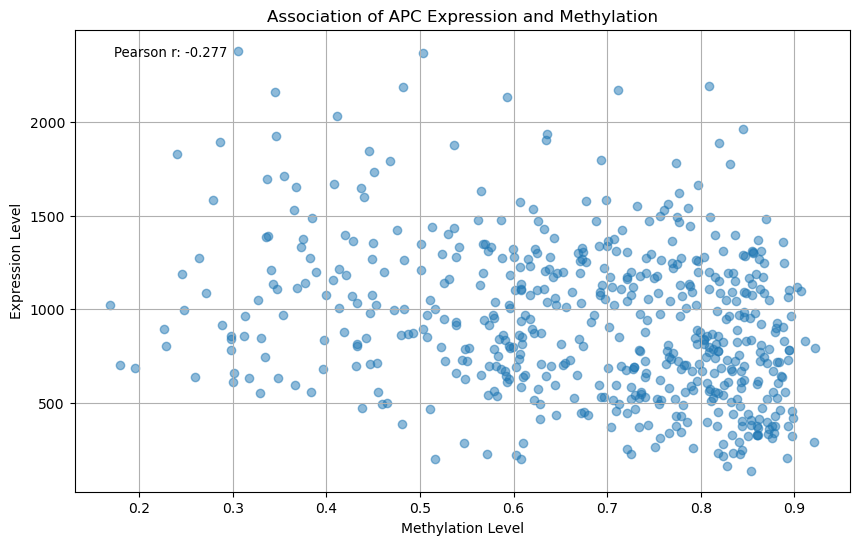

In [21]:
#methylation vs. expression
plt.figure(figsize=(10, 6))
plt.scatter(combined.iloc[:, 1], combined.iloc[:, 0], alpha=0.5)  
correlation = combined['Expression'].corr(combined['Methylation']) #Pearson correlation coefficent 
plt.annotate(f'Pearson r: {correlation:.3f}', 
             xy=(0.05, 0.95), 
             xycoords='axes fraction', 
             ha='left', 
             va='center', 
             fontsize=9.5)
plt.title('Association of APC Expression and Methylation')
plt.xlabel('Methylation Level')
plt.ylabel('Expression Level')
plt.grid(True)
plt.show()

In [22]:
cna

,Entrez_Gene_Id,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,TCGA-A1-A0SE-01,TCGA-A1-A0SF-01,TCGA-A1-A0SH-01,TCGA-A1-A0SI-01,TCGA-A1-A0SJ-01,TCGA-A1-A0SK-01,TCGA-A1-A0SM-01,...,TCGA-LL-A5YM-01,TCGA-LL-A5YN-01,TCGA-LL-A5YO-01,TCGA-LL-A5YP-01,TCGA-LQ-A4E4-01,TCGA-MS-A51U-01,TCGA-OL-A66H-01,TCGA-OL-A66I-01,TCGA-OL-A66J-01,TCGA-OL-A66K-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
ACAP3,116983.0,0,-1,0,0,-1,0,0,1,-1,...,-1,0,-1,2,-1,0,0,1,-2,-1
ACTRT2,140625.0,0,-1,0,0,-1,0,0,1,-1,...,-1,0,-1,2,-1,0,0,1,-2,-1
AGRN,375790.0,0,-1,0,0,-1,0,0,1,-1,...,-1,0,-1,2,-1,0,0,1,-2,-1
ANKRD65,441869.0,0,-1,0,0,-1,0,0,1,-1,...,-1,0,-1,2,-1,0,0,1,-2,-1
ATAD3A,55210.0,0,-1,0,0,-1,0,0,1,-1,...,-1,0,-1,2,-1,0,0,1,-2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MIR549,NaN,0,0,0,1,0,-1,0,0,0,...,1,-1,0,-1,0,0,0,-1,0,-1
MIR4520B,NaN,0,-1,-1,-1,-1,-1,-1,-1,0,...,0,-1,-1,1,-1,1,0,-1,0,1
MIR3676,NaN,0,-1,-1,-1,-1,-1,-1,-1,0,...,-1,1,-1,1,-1,1,0,-1,0,1


In [23]:
#gets rows that are APC
apc_cna=cna.loc['APC']

#gets rid of hugo symbol row and entrez id
combined1=apc_exp.join(apc_cna).iloc[2:] 

#changes column name
combined1 = combined1.rename(columns={813:'Expression', 'APC':'Copy Number'}) 

#gets rid of missing value (1)
combined1 = combined1.dropna(subset=['Copy Number','Expression']) 

#to numeric
combined1['Copy Number'] = pd.to_numeric(combined1['Copy Number'])

#to numeric
combined1['Expression'] = pd.to_numeric(combined1['Expression'])

combined1


,Expression,Copy Number
TCGA-A1-A0SE-01,1170.2180,0.0
TCGA-A1-A0SF-01,562.4939,0.0
TCGA-A1-A0SH-01,1244.5319,0.0
TCGA-A1-A0SI-01,895.5268,0.0
TCGA-A1-A0SJ-01,1078.0064,1.0
...,...,...
TCGA-MS-A51U-01,694.8357,1.0
TCGA-OL-A66H-01,513.7615,0.0
TCGA-OL-A66I-01,361.8153,-1.0
TCGA-OL-A66J-01,494.3668,-1.0


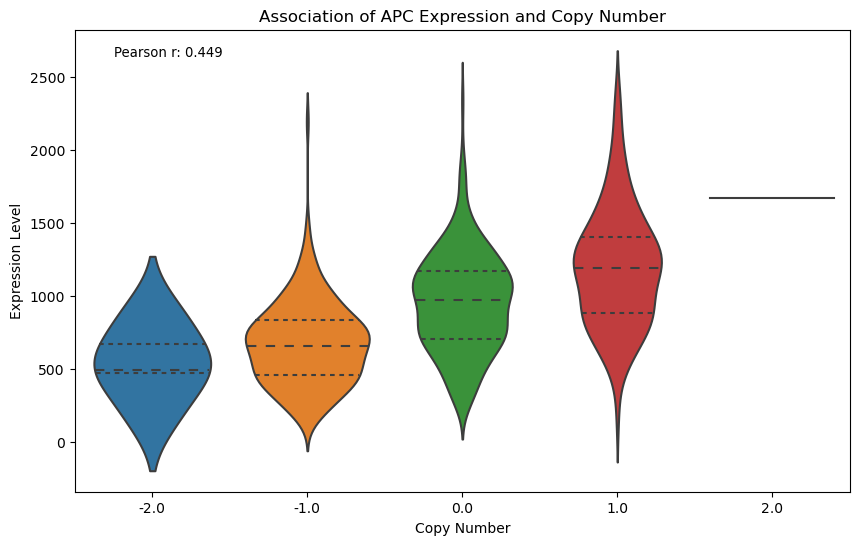

In [24]:
#copy number vs expression


plt.figure(figsize=(10, 6))

#violin plot
sns.violinplot(x='Copy Number', y='Expression', data=combined1, inner='quartile')

#Calculate Pearson correlation coefficient
correlation = combined1['Expression'].corr(combined1['Copy Number'])

# Annotate the plot with the Pearson correlation coefficient
plt.annotate(f'Pearson r: {correlation:.3f}',
             xy=(0.05, 0.95),
             xycoords='axes fraction',
             ha='left',
             va='center',
             fontsize=9.5)

plt.title('Association of APC Expression and Copy Number')
plt.xlabel('Copy Number')
plt.ylabel('Expression Level')
plt.show()

## Mutual exclusivity and co-occurrence analysis. 

- contingency table fischers exact test 
- Analyze your top 3 most mutated genes from above. Make a visualization that allows you to compare mutual exclusivity or co-occurrence for all pairs of any two of these mutations. 

For the non-coding project: calculate/obtain the p-value for mutual exclusivity or co-occurrence using the Fisher's exact test for 3 pairs of genes. Interpret the results to explain what the findings mean.

- I made a heat map to show show co-occurrence/mutal exclusivty between APC, TCF4 and TCF20. From this visualization we can see that these genes are mutually exclusive we can tell this because at the top we see that there are only 2/33 cases where APC and TCF20 where mutated and the same thing for APC and TCF4. For the relationship between TCF4 and TCF20 these genes within our data set don't occur together as well. 

In [25]:
#filters out synonymous variants 
mak = top3['Consequence'] != 'synonymous_variant' 

#makes new df of applied filter
co = top3[mak]

co

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,MOTIF_SCORE_CHANGE,PolyPhen,ENSP,Amino_acids,CCDS,EA_MAF,Allele,cDNA_position,PUBMED,OS_STATUS
Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,
TCGA-A2-A3XT,TCF20,6942,genome.wustl.edu;unc.edu,GRCh37,22,42607383,42607383,+,missense_variant,Missense_Mutation,...,NaN,possibly_damaging(0.541),ENSP00000352463,S/C,CCDS14033.1,NaN,C,4066/7410,NaN,0:LIVING
TCGA-A7-A3IZ,APC,324,genome.wustl.edu,GRCh37,5,112155003,112155006,+,frameshift_variant,Frame_Shift_Del,...,NaN,NaN,ENSP00000413133,NaN,CCDS4107.1,NaN,-,1654-1657/11025,NaN,0:LIVING
TCGA-A8-A084,TCF20,6942,genome.wustl.edu;unc.edu,GRCh37,22,42607000,42607000,+,missense_variant,Missense_Mutation,...,NaN,possibly_damaging(0.453),ENSP00000352463,R/C,CCDS14033.1,NaN,A,4449/7410,NaN,0:LIVING
TCGA-A8-A08T,TCF20,6942,genome.wustl.edu;unc.edu,GRCh37,22,42609296,42609298,+,inframe_deletion,In_Frame_Del,...,NaN,NaN,ENSP00000352463,N/-,CCDS14033.1,NaN,-,2151-2153/7410,NaN,1:DECEASED
TCGA-AC-A23H,APC,324,genome.wustl.edu;unc.edu,GRCh37,5,112176467,112176467,+,missense_variant,Missense_Mutation,...,NaN,possibly_damaging(0.861),ENSP00000413133,E/Q,CCDS4107.1,NaN,C,5556/11025,NaN,1:DECEASED
TCGA-AC-A23H,APC,324,genome.wustl.edu;unc.edu,GRCh37,5,112179740,112179740,+,missense_variant,Missense_Mutation,...,NaN,probably_damaging(1),ENSP00000413133,D/H,CCDS4107.1,NaN,C,8829/11025,NaN,1:DECEASED
TCGA-AN-A0AK,TCF20,6942,genome.wustl.edu,GRCh37,22,42610948,42610948,+,frameshift_variant,Frame_Shift_Del,...,NaN,NaN,ENSP00000352463,NaN,CCDS14033.1,0.000116,-,501/7410,NaN,0:LIVING
TCGA-AN-A0AK,TCF4,6925,genome.wustl.edu,GRCh37,18,52895520,52895520,+,frameshift_variant,Frame_Shift_Del,...,NaN,NaN,ENSP00000381382,NaN,CCDS58631.1,0.000116,-,2315/2478,NaN,0:LIVING
TCGA-AR-A1AX,APC,324,genome.wustl.edu;unc.edu,GRCh37,5,112177283,112177283,+,missense_variant,Missense_Mutation,...,NaN,benign(0.284),ENSP00000413133,E/K,CCDS4107.1,NaN,A,6372/11025,NaN,0:LIVING


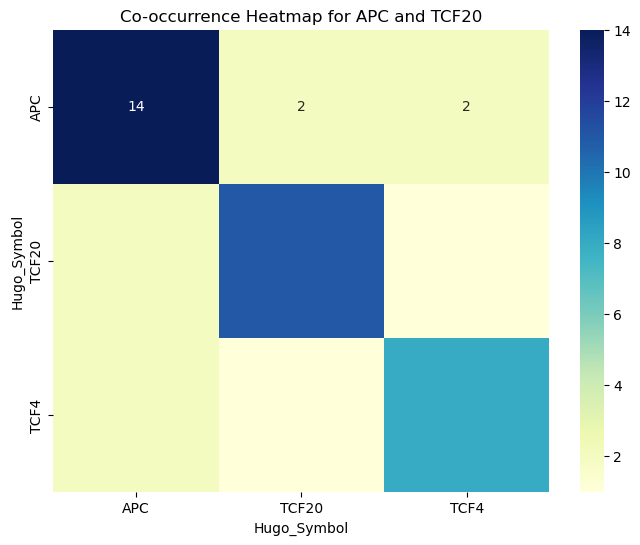

In [26]:
#creates pivot table rows samples columns gene symbols
mutation_matrix = co.pivot_table(index='Tumor_Sample_Barcode', columns='Hugo_Symbol', aggfunc='size', fill_value=0)

#convert counts in mutation matrix
mutation_matrix = (mutation_matrix > 0).astype(int) 

#calculate co-occurrence shows count of co-occuring mutations for each pair
co_occurrence_matrix = mutation_matrix.T.dot(mutation_matrix)

#plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(co_occurrence_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Co-occurrence Heatmap for APC and TCF20")
plt.show()

In [27]:
co_occurrence_matrix

Hugo_Symbol,APC,TCF20,TCF4
Hugo_Symbol,,,
APC,14,2,2
TCF20,2,11,1
TCF4,2,1,8


## Make one other plot to learn about the effect of this pathway on this cancer, using any of the data you have about the cancer cohort. Meaning, a different from the ones already required, using coding:
Form a hypothesis of something you expect to see in this cancer data. Describe what kind of plot you choose and how it will help assess your hypothesis. What do you expect to see? 

- I propose that elevated levels of beta-catenin expression is associated with a positive immunohistochemistry results of HER2. I would expect to see the those who have a positive status will have higher levels of expression in beta-catenin. I will use a violin plot to get a clear distribution of the expression levels across different IHC-HER2 statuses within the cohort.

    
Provide code to make the plot. The code must work and must be explained so someone else can understand how it works

Interpret the plot: how does the plot allow you to assess your hypothesis? What do you conclude by looking at this.

- The plot allows me to assess the hypothesis by comparing the distribution of beta-catenin expression levels in groups of patients who have positive/negative IHC HER2 result. The plot shows that beta-catenin expression varies with HER2 status. The negative HER2 status group has a broad range of beta-catenin expression, including both low and high levels. The positive HER2 status group shows a more concentrated range of expression, mostly around the middle, indicating a more consistent level of Beta-Catenin expression among these samples. Overall, the data does not show a clear distinction in beta-catenin expression levels among positive/negative HER2 IHC. 

In [30]:
#Selects column from clinical samples df that has IHC data
her2 = rppa.loc[:,'IHC_HER2'] 

#filters for beta-catenin drops, entrez id column, samples in rows, features in columns
ctn_expression = exp[exp['Hugo_Symbol']=='CTNNB1'].drop(columns=['Entrez_Gene_Id']).transpose()

#joins by index
ctn_her2 = ctn_expression.join(her2)

#removes hugo symbol row
ctn_her2= ctn_her2.iloc[1:]


#renames column 
ctn_her2=ctn_her2.rename(columns={4380:'CTNNB1_Expression'})


#converts values to numeric 
ctn_her2['CTNNB1_Expression'] = pd.to_numeric(ctn_her2['CTNNB1_Expression'], errors='coerce') #numeric

#removes any nas 
ctn_her2.dropna(subset=['CTNNB1_Expression'], inplace=True)

#boolean mask to remove patients with no ihc results#
mask = ~ctn_her2['IHC_HER2'].isin(['[Not Available]', 'Indeterminate', 'Equivocal']) 

#indexes into df
ctn_her2 = ctn_her2[mask]

#converts into categorical variable
ctn_her2['IHC_HER2'] = ctn_her2['IHC_HER2'].astype('category') 


ctn_her2

,CTNNB1_Expression,IHC_HER2
TCGA-A1-A0SB-01,41436.8465,Negative
TCGA-A1-A0SD-01,11618.7941,Negative
TCGA-A1-A0SE-01,12132.2024,Negative
TCGA-A1-A0SF-01,6679.6173,Negative
TCGA-A1-A0SI-01,11597.9017,Negative
...,...,...
TCGA-LL-A441-01,22705.9403,Negative
TCGA-LL-A5YL-01,3807.9232,Positive
TCGA-LL-A5YO-01,6314.1897,Negative
TCGA-LL-A5YP-01,12564.1727,Negative


In [31]:

link = 'https://raw.githubusercontent.com/madisonmedeiros/breast_cancer/main/ctn_her2.csv'
ctn_her2 = pd.read_csv(link)

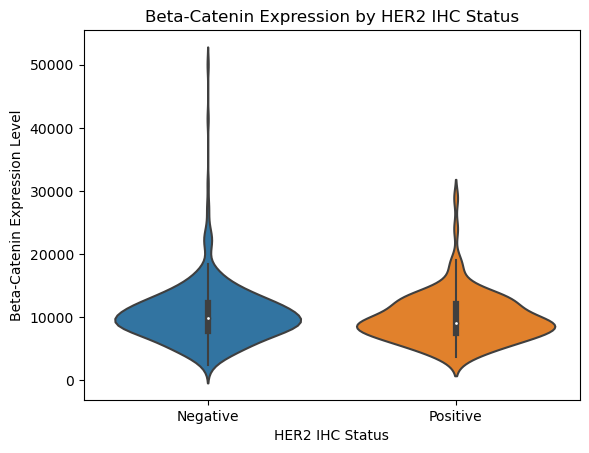

In [32]:
# Makes violin plot
sns.violinplot(x='IHC_HER2', y='CTNNB1_Expression', data=ctn_her2)
plt.title('Beta-Catenin Expression by HER2 IHC Status')
plt.xlabel('HER2 IHC Status')
plt.ylabel('Beta-Catenin Expression Level')
plt.show()

## Find one other research article related to this type of cancer that refers to either: the activity of this pathway; or the genes/mutations in the pathway; or a drug and how it can impact that pathway in that cancer. 

https://aacrjournals.org/mcr/article/10/12/1597/89153/Expression-of-Wnt3-Activates-Wnt-Catenin-Pathway

Describe the:

knowledge gap

 - The gap in knowledge is the lack of understandning the mechanism that leads to trastuzumb resistance in patients with HER2-over expressing breast cancer

 hypothesis

- The hypothesis of the paper is that the development of trastuzumab resistance in HER2-overexpressing breast cancer is related to the activation of specific signaling pathways such as PI3K/Akt and Wnt signaling.

experimental design of the paper (what are the observations and how many observations; and what are the variables and approximately how many)

- The observations are the cell lines. There are 4 different cell lines used SKBR3 and BT474 where used to make trastuzumab-resistant clones SKBR3/100-8 and BT474/100-2.
        
- The features of the study design are the genes which there is about 20,000 protein coding genes.

Summarize how the findings in the article relates to your findings above about the pathway.

- In the paper it was found that overexpresion of WNT3 played a key role in the development of trastuzumab resistance. This relates my findings that copy number alterations affect the expression of wnt signaling genes in breast cancer. 

Include the two most relevant figures from the paper. For each figure:

![graph2](https://i.imgur.com/Vwvy3lk.png)

explain what are the axes (horizontal and vertical)

- On the y-axis is the fold change of expression. On the x-axis are genes involved in Wnt signaling

what the points, bars, colors mean (depending on the plot. Please see me if you are not sure which parts to explain)

- The bars each represent one gene and the dark colors represent upregulation and the light gray represents downregulation

Copy over one sentence (quote the sentence) showing a conclusions they made based on this figure

- "Compared with SKBR3 cells, 22 genes in the Wnt pathway were significantly deregulated in SKBR3/100-8. Eleven genes were upregulated by ≥2-fold and 11 genes were downregulated by ≥2-fold in SKBR3/100-8 cells compared with SKBR3 cells (Fig. 2A)." (Wu et al.,2012)

-  From the bars we can see that 11 genes (bars in positive y-axis) that are apart of wnt signaling are upregulated some even reaching above 2-fold. We also see the same thing for the downregulated genes. This means the expression levels varied greatly between SKBR3 and SKBR3/100-8 cells.    

![graph3](https://i.imgur.com/hSDyPi3.png)

explain what are the axes (horizontal and vertical)

- On the y-axis is the relative expression and on the x-axis is the genes 

what the points, bars, colors mean (depending on the plot. Please see me if you are not sure which parts to explain)

- For each gene there are two bars the white bar represents the cell line was treated with a control siRNA. Meaning this is our baseline measure while the black bars represent the relative expression level of the same gene after treatment and this case targeting Wnt3 


Copy over one sentence (quote the sentence) showing a conclusions they made based on this figure

- "The siRNA knockdown of Wnt3 increased E-cadherin and decreased Slug and Twist in both SKBR3/100-8 and BT474/100-2 cells compared with SKBR3 and BT474 cells (Fig. 3D and E, left)." (Wu et al.,2012)

- The figure supports this sentence becuase E-cadherin levels are increased and both Slug and Twist levels are decreased with siRNA-Wnt3 treatment compared to mock treatment, as indicated by the bars. This supports the statement regarding the effects of Wnt3 knockdown on the expression of these genes in SKBR3/100-8 and BT474/100-2 cell lines.